## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
from keras.layers import Dropout
from keras.layers import BatchNormalization
import itertools
import time

import matplotlib.pyplot as plt
%matplotlib inline

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "None"


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, regularizers, bn, dropout_ratio, num_neurons = [512, 256, 128], output_units=10):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer = regularizers)(input_layer)
            x = Dropout(dropout_ratio)(x)
            if bn:
                x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer = regularizers)(x)
            x = Dropout(dropout_ratio)(x)
            if bn:
                x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
將結果繪出
"""
def plot_result(name_tag, result_dict):
    color_bar = ["r", "g", "b", "y", "m", "k"]
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Loss")
    #plt.ylim([0, 5])
    plt.legend(loc = 'upper right')
    plt.show()
    
    plt.figure(figsize=(12,10))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    
    plt.title(name_tag + " - Accuracy")
    plt.legend(loc = 'upper left')
    plt.show()

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
MOMENTUM = 0.95
BATCH_SIZE = 256
REG_RATIO = 0.0001

DROPOUT_R = [0.2, 0.3, 0.4, 0.5]
REGULARIZER = ['L1', 'L2', 'L1_L2']
BATCH_NORMALIZATION = [False, True]


DROPOUT_R = 0.2
REGULARIZER = L1
BATCH_NORMALIZATION = False

reg = L1
regularizer = <function <lambda> at 0x000001EF7E7F5400>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896   

50000/50000 [==============================] - 12s 242us/step - loss: 3.0576 - accuracy: 0.5281 - val_loss: 3.0332 - val_accuracy: 0.5344
Epoch 45/50
50000/50000 [==============================] - 13s 251us/step - loss: 3.0140 - accuracy: 0.5289 - val_loss: 3.0103 - val_accuracy: 0.5279
Epoch 46/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.9721 - accuracy: 0.5309 - val_loss: 2.9630 - val_accuracy: 0.5295
Epoch 47/50
50000/50000 [==============================] - 12s 240us/step - loss: 2.9362 - accuracy: 0.5322 - val_loss: 2.9413 - val_accuracy: 0.5269
Epoch 48/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.8960 - accuracy: 0.5360 - val_loss: 2.8936 - val_accuracy: 0.5320
Epoch 49/50
50000/50000 [==============================] - 12s 243us/step - loss: 2.8569 - accuracy: 0.5385 - val_loss: 2.8619 - val_accuracy: 0.5315
Epoch 50/50
10000/10000 [==============================] - 2s 217us/step
Test loss: 2.8186790451049806
Test accu

50000/50000 [==============================] - 13s 252us/step - loss: 3.5383 - accuracy: 0.4950 - val_loss: 3.5265 - val_accuracy: 0.4909
Epoch 35/50
50000/50000 [==============================] - 12s 249us/step - loss: 3.4885 - accuracy: 0.4949 - val_loss: 3.5202 - val_accuracy: 0.4738
Epoch 36/50
50000/50000 [==============================] - 13s 250us/step - loss: 3.4452 - accuracy: 0.4962 - val_loss: 3.4484 - val_accuracy: 0.4835
Epoch 37/50
50000/50000 [==============================] - 12s 250us/step - loss: 3.3801 - accuracy: 0.5028 - val_loss: 3.4222 - val_accuracy: 0.4855
Epoch 38/50
50000/50000 [==============================] - 12s 250us/step - loss: 3.3382 - accuracy: 0.5028 - val_loss: 3.3762 - val_accuracy: 0.4867
Epoch 39/50
50000/50000 [==============================] - 13s 257us/step - loss: 3.2822 - accuracy: 0.5084 - val_loss: 3.3297 - val_accuracy: 0.4886
Epoch 40/50
50000/50000 [==============================] - 12s 250us/step - loss: 3.2468 - accuracy: 0.5054 - va

50000/50000 [==============================] - 11s 228us/step - loss: 1.5446 - accuracy: 0.4976 - val_loss: 1.5123 - val_accuracy: 0.5099
Epoch 28/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.5390 - accuracy: 0.5016 - val_loss: 1.5031 - val_accuracy: 0.5115
Epoch 29/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5289 - accuracy: 0.5038 - val_loss: 1.5034 - val_accuracy: 0.5089
Epoch 30/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5189 - accuracy: 0.5105 - val_loss: 1.4940 - val_accuracy: 0.5111
Epoch 31/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.5087 - accuracy: 0.5117 - val_loss: 1.5080 - val_accuracy: 0.5126
Epoch 32/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.4988 - accuracy: 0.5153 - val_loss: 1.4851 - val_accuracy: 0.5142
Epoch 33/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.4866 - accuracy: 0.5190 - va

50000/50000 [==============================] - 12s 239us/step - loss: 1.5971 - accuracy: 0.4742 - val_loss: 1.5540 - val_accuracy: 0.4904
Epoch 18/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5836 - accuracy: 0.4804 - val_loss: 1.5575 - val_accuracy: 0.4874
Epoch 19/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.5742 - accuracy: 0.4796 - val_loss: 1.5478 - val_accuracy: 0.4956
Epoch 20/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5614 - accuracy: 0.4877 - val_loss: 1.5769 - val_accuracy: 0.4830
Epoch 21/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.5622 - accuracy: 0.4863 - val_loss: 1.5419 - val_accuracy: 0.4969
Epoch 22/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5522 - accuracy: 0.4889 - val_loss: 1.5398 - val_accuracy: 0.4945
Epoch 23/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.5473 - accuracy: 0.4911 - va

50000/50000 [==============================] - 12s 245us/step - loss: 5.1388 - accuracy: 0.4139 - val_loss: 5.0226 - val_accuracy: 0.4502
Epoch 11/50
50000/50000 [==============================] - 12s 243us/step - loss: 5.0530 - accuracy: 0.4222 - val_loss: 4.9362 - val_accuracy: 0.4580
Epoch 12/50
50000/50000 [==============================] - 13s 252us/step - loss: 4.9699 - accuracy: 0.4284 - val_loss: 4.8700 - val_accuracy: 0.4579
Epoch 13/50
50000/50000 [==============================] - 12s 245us/step - loss: 4.8890 - accuracy: 0.4357 - val_loss: 4.7794 - val_accuracy: 0.4649
Epoch 14/50
50000/50000 [==============================] - 12s 246us/step - loss: 4.8092 - accuracy: 0.4415 - val_loss: 4.7041 - val_accuracy: 0.4675
Epoch 15/50
50000/50000 [==============================] - 12s 243us/step - loss: 4.7335 - accuracy: 0.4456 - val_loss: 4.6281 - val_accuracy: 0.4751
Epoch 16/50
50000/50000 [==============================] - 12s 246us/step - loss: 4.6559 - accuracy: 0.4508 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 285us/step - loss: 6.3695 - accuracy: 0.2465 - val_loss: 5.9094 - val_accuracy: 0.3463
Epoch 2/50
50000/50000 [==============================] - 13s 265us/step - loss: 5.9554 - accuracy: 0.3263 - val_loss: 5.7193 - val_accuracy: 0.3839
Epoch 3/50
50000/50000 [==============================] - 13s 266us/step - loss: 5.7636 - accuracy: 0.3592 - val_loss: 5.5997 - val_accuracy: 0.4019
Epoch 4/50
50000/50000 [==============================] - 13s 268us/step - loss: 5.6254 - accuracy: 0.3824 - val_loss: 5.4823 - val_accuracy: 0.4263
Epoch 5/50
50000/50000 [==============================] - 13s 268us/step - loss: 5.5062 - accuracy: 0.3992 - val_loss: 5.3824 - val_accuracy: 0.4287
Epoch 6/50
50000/50000 [==============================] - 13s 265us/step - loss: 5.3990 - accuracy: 0.4147 - val_loss: 5.2894 - val_accuracy: 0.4377
Epoch 7/50
50000/50000 [==============================] 

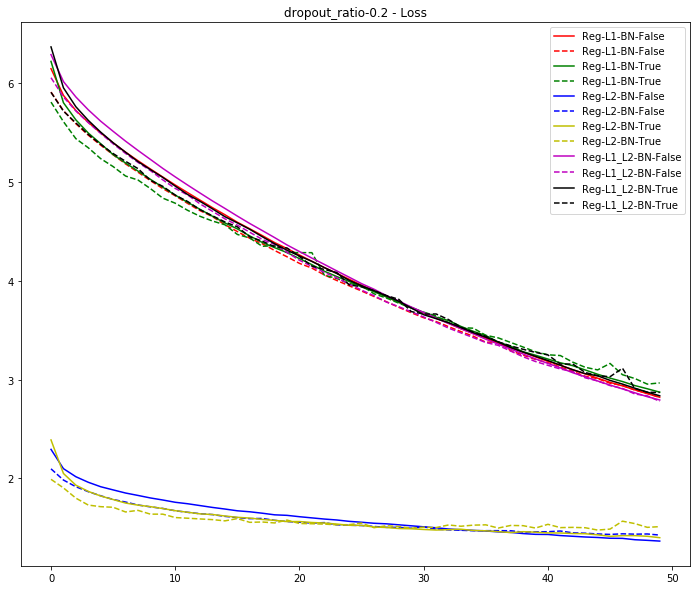

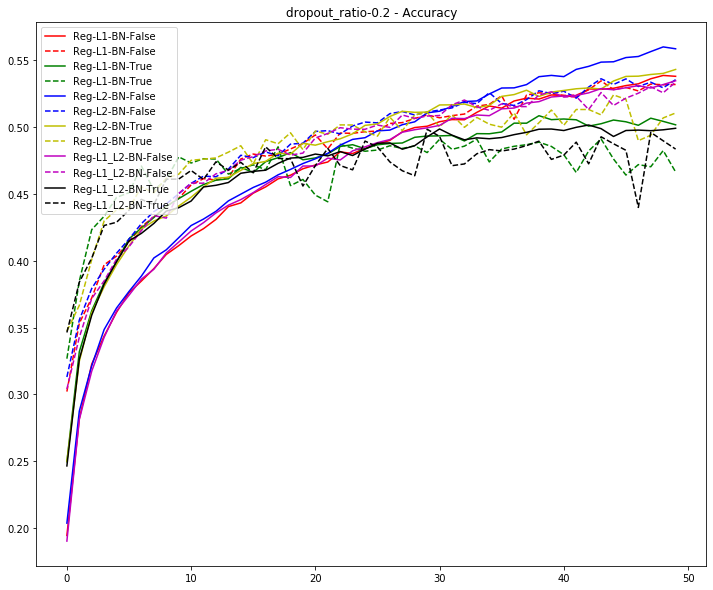

total time of 3 different regularizers x 2 BN: 3827.2555475234985 seconds 


DROPOUT_R = 0.3
REGULARIZER = L1
BATCH_NORMALIZATION = False

reg = L1
regularizer = <function <lambda> at 0x000001EF0EC1D488>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_____________________________________________________

50000/50000 [==============================] - 11s 225us/step - loss: 3.1312 - accuracy: 0.4949 - val_loss: 3.0827 - val_accuracy: 0.5037
Epoch 45/50
50000/50000 [==============================] - 11s 222us/step - loss: 3.0905 - accuracy: 0.4993 - val_loss: 3.0280 - val_accuracy: 0.5109
Epoch 46/50
50000/50000 [==============================] - 11s 222us/step - loss: 3.0516 - accuracy: 0.4969 - val_loss: 2.9996 - val_accuracy: 0.5078
Epoch 47/50
50000/50000 [==============================] - 11s 223us/step - loss: 3.0171 - accuracy: 0.4982 - val_loss: 2.9730 - val_accuracy: 0.5022
Epoch 48/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.9759 - accuracy: 0.5020 - val_loss: 2.9249 - val_accuracy: 0.5088
Epoch 49/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.9423 - accuracy: 0.5005 - val_loss: 2.8938 - val_accuracy: 0.5026
Epoch 50/50
10000/10000 [==============================] - 2s 204us/step
Test loss: 2.8610938640594483
Test accu

50000/50000 [==============================] - 12s 244us/step - loss: 3.6345 - accuracy: 0.4532 - val_loss: 3.5389 - val_accuracy: 0.4825
Epoch 35/50
50000/50000 [==============================] - 12s 247us/step - loss: 3.5826 - accuracy: 0.4569 - val_loss: 3.5567 - val_accuracy: 0.4580
Epoch 36/50
50000/50000 [==============================] - 12s 247us/step - loss: 3.5399 - accuracy: 0.4578 - val_loss: 3.4816 - val_accuracy: 0.4732
Epoch 37/50
50000/50000 [==============================] - 12s 245us/step - loss: 3.5060 - accuracy: 0.4521 - val_loss: 3.4628 - val_accuracy: 0.4649
Epoch 38/50
50000/50000 [==============================] - 12s 243us/step - loss: 3.4552 - accuracy: 0.4560 - val_loss: 3.3668 - val_accuracy: 0.4757
Epoch 39/50
50000/50000 [==============================] - 12s 246us/step - loss: 3.4064 - accuracy: 0.4617 - val_loss: 3.3651 - val_accuracy: 0.4670
Epoch 40/50
50000/50000 [==============================] - 12s 248us/step - loss: 3.3613 - accuracy: 0.4604 - va

50000/50000 [==============================] - 11s 223us/step - loss: 1.6371 - accuracy: 0.4663 - val_loss: 1.5707 - val_accuracy: 0.4883
Epoch 28/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.6324 - accuracy: 0.4682 - val_loss: 1.5605 - val_accuracy: 0.4946
Epoch 29/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6198 - accuracy: 0.4694 - val_loss: 1.5480 - val_accuracy: 0.5006
Epoch 30/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6113 - accuracy: 0.4761 - val_loss: 1.5444 - val_accuracy: 0.4967
Epoch 31/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6054 - accuracy: 0.4745 - val_loss: 1.5338 - val_accuracy: 0.5052
Epoch 32/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6007 - accuracy: 0.4806 - val_loss: 1.5346 - val_accuracy: 0.5069
Epoch 33/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.5928 - accuracy: 0.4810 - va

50000/50000 [==============================] - 12s 238us/step - loss: 1.6943 - accuracy: 0.4430 - val_loss: 1.6162 - val_accuracy: 0.4679
Epoch 18/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.6894 - accuracy: 0.4409 - val_loss: 1.6138 - val_accuracy: 0.4740
Epoch 19/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6743 - accuracy: 0.4452 - val_loss: 1.6392 - val_accuracy: 0.4599
Epoch 20/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6690 - accuracy: 0.4512 - val_loss: 1.5911 - val_accuracy: 0.4751
Epoch 21/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.6570 - accuracy: 0.4539 - val_loss: 1.5964 - val_accuracy: 0.4729
Epoch 22/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6494 - accuracy: 0.4568 - val_loss: 1.5927 - val_accuracy: 0.4812
Epoch 23/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.6458 - accuracy: 0.4573 - va

50000/50000 [==============================] - 13s 251us/step - loss: 5.2017 - accuracy: 0.3858 - val_loss: 5.0669 - val_accuracy: 0.4294
Epoch 11/50
50000/50000 [==============================] - 13s 253us/step - loss: 5.1194 - accuracy: 0.3953 - val_loss: 4.9842 - val_accuracy: 0.4403acy
Epoch 12/50
50000/50000 [==============================] - 13s 255us/step - loss: 5.0340 - accuracy: 0.4000 - val_loss: 4.9065 - val_accuracy: 0.4406
Epoch 13/50
50000/50000 [==============================] - 13s 253us/step - loss: 4.9521 - accuracy: 0.4057 - val_loss: 4.8159 - val_accuracy: 0.4500
Epoch 14/50
50000/50000 [==============================] - 12s 250us/step - loss: 4.8730 - accuracy: 0.4141 - val_loss: 4.7395 - val_accuracy: 0.4581
Epoch 15/50
50000/50000 [==============================] - 13s 255us/step - loss: 4.7970 - accuracy: 0.4188 - val_loss: 4.6715 - val_accuracy: 0.4548
Epoch 16/50
50000/50000 [==============================] - 13s 255us/step - loss: 4.7207 - accuracy: 0.4236 -

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 290us/step - loss: 6.4930 - accuracy: 0.2133 - val_loss: 5.9531 - val_accuracy: 0.3198
Epoch 2/50
50000/50000 [==============================] - 14s 272us/step - loss: 6.0622 - accuracy: 0.2884 - val_loss: 5.8127 - val_accuracy: 0.3516
Epoch 3/50
50000/50000 [==============================] - 14s 272us/step - loss: 5.8586 - accuracy: 0.3244 - val_loss: 5.6492 - val_accuracy: 0.3797
Epoch 4/50
50000/50000 [==============================] - 13s 268us/step - loss: 5.7093 - accuracy: 0.3504 - val_loss: 5.5226 - val_accuracy: 0.4022
Epoch 5/50
50000/50000 [==============================] - 14s 274us/step - loss: 5.5965 - accuracy: 0.3650 - val_loss: 5.4277 - val_accuracy: 0.4162
Epoch 6/50
50000/50000 [==============================] - 13s 270us/step - loss: 5.4809 - accuracy: 0.3786 - val_loss: 5.3260 - val_accuracy: 0.4219
Epoch 7/50
50000/50000 [==============================] 

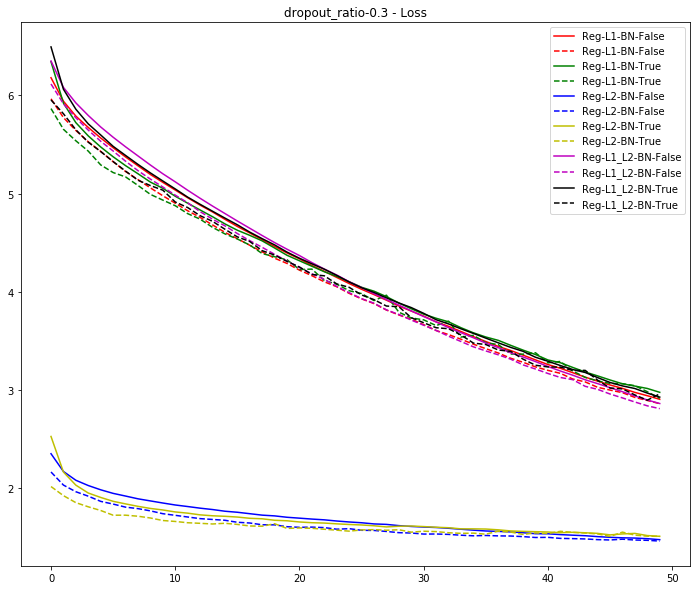

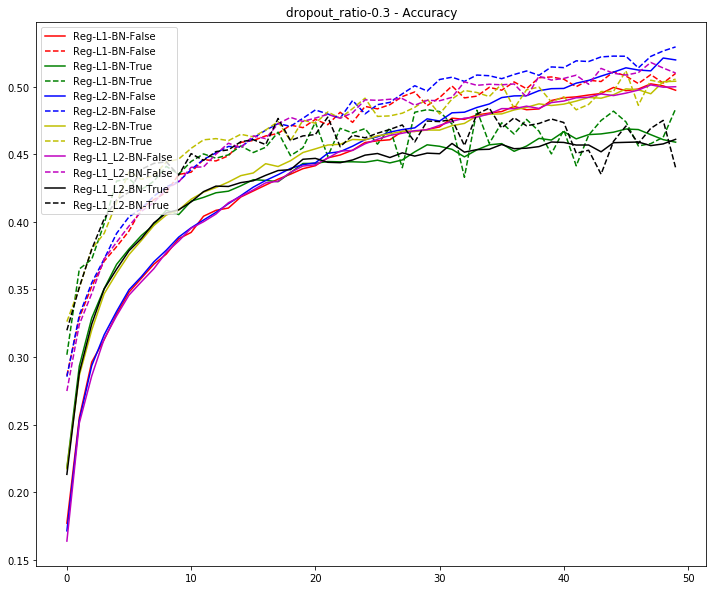

total time of 3 different regularizers x 2 BN: 3741.57971739769 seconds 


DROPOUT_R = 0.4
REGULARIZER = L1
BATCH_NORMALIZATION = False

reg = L1
regularizer = <function <lambda> at 0x000001EF130C3400>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_______________________________________________________

50000/50000 [==============================] - 11s 228us/step - loss: 3.2282 - accuracy: 0.4553 - val_loss: 3.1200 - val_accuracy: 0.4885
Epoch 45/50
50000/50000 [==============================] - 11s 228us/step - loss: 3.1888 - accuracy: 0.4542 - val_loss: 3.0741 - val_accuracy: 0.4955
Epoch 46/50
50000/50000 [==============================] - 12s 233us/step - loss: 3.1497 - accuracy: 0.4553 - val_loss: 3.0333 - val_accuracy: 0.4923
Epoch 47/50
50000/50000 [==============================] - 12s 230us/step - loss: 3.1020 - accuracy: 0.4603 - val_loss: 2.9988 - val_accuracy: 0.4884
Epoch 48/50
50000/50000 [==============================] - 11s 227us/step - loss: 3.0652 - accuracy: 0.4590 - val_loss: 2.9693 - val_accuracy: 0.4912
Epoch 49/50
50000/50000 [==============================] - 11s 228us/step - loss: 3.0311 - accuracy: 0.4603 - val_loss: 2.9267 - val_accuracy: 0.4957
Epoch 50/50
10000/10000 [==============================] - 2s 208us/step
Test loss: 2.87834561958313
Test accura

50000/50000 [==============================] - 12s 246us/step - loss: 3.7217 - accuracy: 0.4204 - val_loss: 3.5809 - val_accuracy: 0.4658
Epoch 35/50
50000/50000 [==============================] - 12s 245us/step - loss: 3.6795 - accuracy: 0.4196 - val_loss: 3.5829 - val_accuracy: 0.4458
Epoch 36/50
50000/50000 [==============================] - 12s 245us/step - loss: 3.6411 - accuracy: 0.4172 - val_loss: 3.5034 - val_accuracy: 0.4616
Epoch 37/50
50000/50000 [==============================] - 12s 248us/step - loss: 3.5991 - accuracy: 0.4181 - val_loss: 3.4634 - val_accuracy: 0.4554
Epoch 38/50
50000/50000 [==============================] - 12s 248us/step - loss: 3.5565 - accuracy: 0.4155 - val_loss: 3.4857 - val_accuracy: 0.4299
Epoch 39/50
50000/50000 [==============================] - 12s 250us/step - loss: 3.5253 - accuracy: 0.4178 - val_loss: 3.4514 - val_accuracy: 0.4415
Epoch 40/50
50000/50000 [==============================] - 12s 244us/step - loss: 3.4753 - accuracy: 0.4169 - va

50000/50000 [==============================] - 11s 224us/step - loss: 1.7325 - accuracy: 0.4283 - val_loss: 1.6256 - val_accuracy: 0.4758
Epoch 28/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7275 - accuracy: 0.4316 - val_loss: 1.6283 - val_accuracy: 0.4735
Epoch 29/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7217 - accuracy: 0.4339 - val_loss: 1.6149 - val_accuracy: 0.4747
Epoch 30/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7102 - accuracy: 0.4379 - val_loss: 1.6060 - val_accuracy: 0.4789
Epoch 31/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7077 - accuracy: 0.4398 - val_loss: 1.5993 - val_accuracy: 0.4833
Epoch 32/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6971 - accuracy: 0.4411 - val_loss: 1.5970 - val_accuracy: 0.4798
Epoch 33/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.6889 - accuracy: 0.4450 - va

50000/50000 [==============================] - 13s 254us/step - loss: 1.7814 - accuracy: 0.4079 - val_loss: 1.6840 - val_accuracy: 0.4445
Epoch 18/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.7696 - accuracy: 0.4111 - val_loss: 1.6904 - val_accuracy: 0.4402
Epoch 19/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7686 - accuracy: 0.4132 - val_loss: 1.6697 - val_accuracy: 0.4486
Epoch 20/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.7534 - accuracy: 0.4192 - val_loss: 1.6485 - val_accuracy: 0.4552
Epoch 21/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7457 - accuracy: 0.4191 - val_loss: 1.6453 - val_accuracy: 0.4628
Epoch 22/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7370 - accuracy: 0.4247 - val_loss: 1.6542 - val_accuracy: 0.4484
Epoch 23/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.7356 - accuracy: 0.4266 - va

50000/50000 [==============================] - 13s 254us/step - loss: 5.2859 - accuracy: 0.3515 - val_loss: 5.1358 - val_accuracy: 0.3955
Epoch 11/50
50000/50000 [==============================] - 13s 253us/step - loss: 5.2042 - accuracy: 0.3556 - val_loss: 5.0495 - val_accuracy: 0.4115
Epoch 12/50
50000/50000 [==============================] - 13s 256us/step - loss: 5.1160 - accuracy: 0.3667 - val_loss: 4.9738 - val_accuracy: 0.4132
Epoch 13/50
50000/50000 [==============================] - 13s 257us/step - loss: 5.0360 - accuracy: 0.3713 - val_loss: 4.8896 - val_accuracy: 0.4188
Epoch 14/50
50000/50000 [==============================] - 13s 256us/step - loss: 4.9574 - accuracy: 0.3759 - val_loss: 4.8119 - val_accuracy: 0.4274
Epoch 15/50
50000/50000 [==============================] - 13s 254us/step - loss: 4.8769 - accuracy: 0.3843 - val_loss: 4.7266 - val_accuracy: 0.4294
Epoch 16/50
50000/50000 [==============================] - 13s 254us/step - loss: 4.8036 - accuracy: 0.3886 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 292us/step - loss: 6.6056 - accuracy: 0.1809 - val_loss: 6.0702 - val_accuracy: 0.2708
Epoch 2/50
50000/50000 [==============================] - 14s 275us/step - loss: 6.1572 - accuracy: 0.2506 - val_loss: 5.8761 - val_accuracy: 0.3265
Epoch 3/50
50000/50000 [==============================] - 14s 275us/step - loss: 5.9518 - accuracy: 0.2856 - val_loss: 5.7594 - val_accuracy: 0.3488
Epoch 4/50
50000/50000 [==============================] - 14s 276us/step - loss: 5.7984 - accuracy: 0.3074 - val_loss: 5.6277 - val_accuracy: 0.3586
Epoch 5/50
50000/50000 [==============================] - 14s 275us/step - loss: 5.6792 - accuracy: 0.3269 - val_loss: 5.5119 - val_accuracy: 0.3815
Epoch 6/50
50000/50000 [==============================] - 14s 277us/step - loss: 5.5772 - accuracy: 0.3384 - val_loss: 5.4358 - val_accuracy: 0.3870
Epoch 7/50
50000/50000 [==============================] 

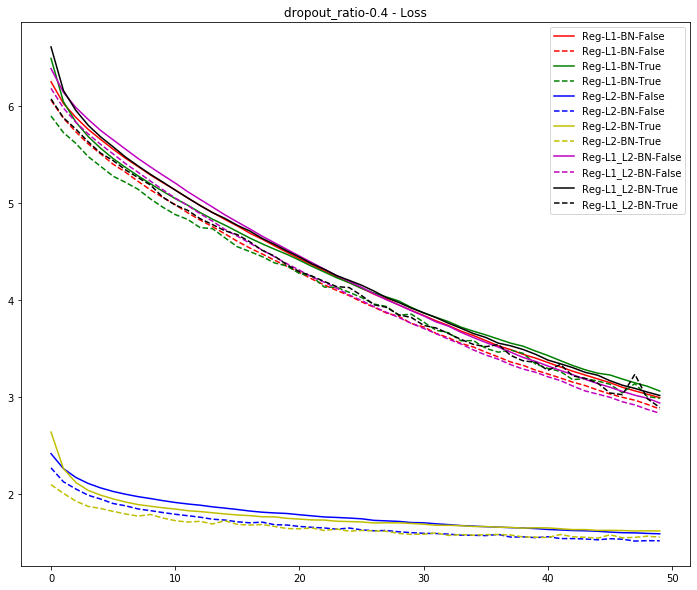

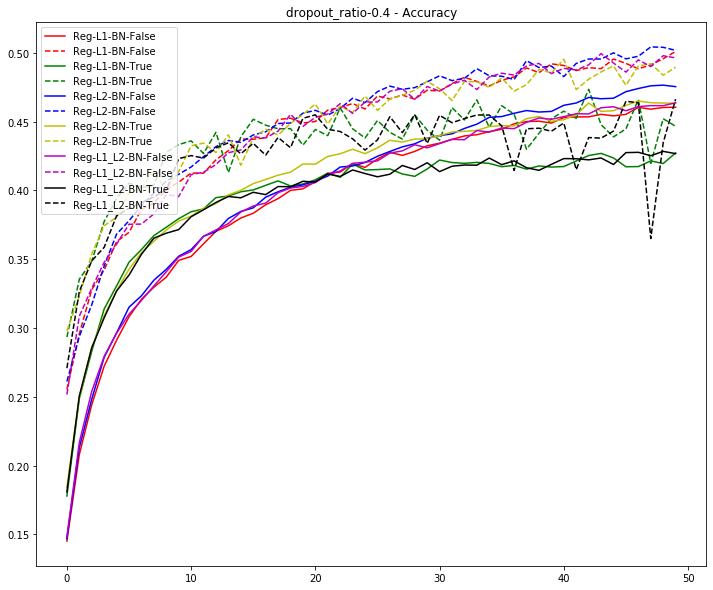

total time of 3 different regularizers x 2 BN: 3768.543214082718 seconds 


DROPOUT_R = 0.5
REGULARIZER = L1
BATCH_NORMALIZATION = False

reg = L1
regularizer = <function <lambda> at 0x000001EF12F7C158>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
______________________________________________________

50000/50000 [==============================] - 11s 229us/step - loss: 3.3230 - accuracy: 0.4126 - val_loss: 3.1666 - val_accuracy: 0.4695
Epoch 45/50
50000/50000 [==============================] - 12s 232us/step - loss: 3.2889 - accuracy: 0.4134 - val_loss: 3.1452 - val_accuracy: 0.4649
Epoch 46/50
50000/50000 [==============================] - 12s 230us/step - loss: 3.2450 - accuracy: 0.4155 - val_loss: 3.1061 - val_accuracy: 0.4653
Epoch 47/50
50000/50000 [==============================] - 12s 235us/step - loss: 3.2044 - accuracy: 0.4187 - val_loss: 3.0644 - val_accuracy: 0.4633
Epoch 48/50
50000/50000 [==============================] - 12s 234us/step - loss: 3.1666 - accuracy: 0.4161 - val_loss: 3.0295 - val_accuracy: 0.4675
Epoch 49/50
50000/50000 [==============================] - 12s 230us/step - loss: 3.1265 - accuracy: 0.4180 - val_loss: 2.9846 - val_accuracy: 0.4640
Epoch 50/50
10000/10000 [==============================] - 2s 205us/step
Test loss: 2.95125368270874
Test accura

50000/50000 [==============================] - 13s 252us/step - loss: 3.8368 - accuracy: 0.3725 - val_loss: 3.6874 - val_accuracy: 0.4263
Epoch 35/50
50000/50000 [==============================] - 13s 254us/step - loss: 3.7823 - accuracy: 0.3745 - val_loss: 3.6474 - val_accuracy: 0.4151
Epoch 36/50
50000/50000 [==============================] - 13s 254us/step - loss: 3.7243 - accuracy: 0.3836 - val_loss: 3.5898 - val_accuracy: 0.4380
Epoch 37/50
50000/50000 [==============================] - 13s 253us/step - loss: 3.6792 - accuracy: 0.3823 - val_loss: 3.5554 - val_accuracy: 0.4157
Epoch 38/50
50000/50000 [==============================] - 13s 256us/step - loss: 3.6407 - accuracy: 0.3793 - val_loss: 3.5099 - val_accuracy: 0.4309
Epoch 39/50
50000/50000 [==============================] - 13s 255us/step - loss: 3.5973 - accuracy: 0.3761 - val_loss: 3.4657 - val_accuracy: 0.4181
Epoch 40/50
50000/50000 [==============================] - 13s 254us/step - loss: 3.5620 - accuracy: 0.3788 - va

50000/50000 [==============================] - 12s 240us/step - loss: 1.8421 - accuracy: 0.3863 - val_loss: 1.7090 - val_accuracy: 0.4424
Epoch 28/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8385 - accuracy: 0.3872 - val_loss: 1.6990 - val_accuracy: 0.4481
Epoch 29/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.8224 - accuracy: 0.3930 - val_loss: 1.7008 - val_accuracy: 0.4450
Epoch 30/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8219 - accuracy: 0.3941 - val_loss: 1.7008 - val_accuracy: 0.4454
Epoch 31/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.8134 - accuracy: 0.3985 - val_loss: 1.6815 - val_accuracy: 0.4530
Epoch 32/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.8043 - accuracy: 0.3983 - val_loss: 1.6757 - val_accuracy: 0.4517
Epoch 33/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7978 - accuracy: 0.4009 - va

50000/50000 [==============================] - 12s 244us/step - loss: 1.8760 - accuracy: 0.3736 - val_loss: 1.7587 - val_accuracy: 0.4159
Epoch 18/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8685 - accuracy: 0.3738 - val_loss: 1.7503 - val_accuracy: 0.4216
Epoch 19/50
50000/50000 [==============================] - 12s 247us/step - loss: 1.8564 - accuracy: 0.3769 - val_loss: 1.7395 - val_accuracy: 0.4279
Epoch 20/50
50000/50000 [==============================] - 12s 248us/step - loss: 1.8529 - accuracy: 0.3788 - val_loss: 1.7553 - val_accuracy: 0.4178
Epoch 21/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.8447 - accuracy: 0.3816 - val_loss: 1.7162 - val_accuracy: 0.4348
Epoch 22/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.8424 - accuracy: 0.3835 - val_loss: 1.7202 - val_accuracy: 0.4228
Epoch 23/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.8352 - accuracy: 0.3858 - va

50000/50000 [==============================] - 13s 255us/step - loss: 5.3670 - accuracy: 0.3106 - val_loss: 5.2114 - val_accuracy: 0.3697
Epoch 11/50
50000/50000 [==============================] - 13s 254us/step - loss: 5.2877 - accuracy: 0.3148 - val_loss: 5.1338 - val_accuracy: 0.3815
Epoch 12/50
50000/50000 [==============================] - 13s 256us/step - loss: 5.2067 - accuracy: 0.3232 - val_loss: 5.0579 - val_accuracy: 0.3904
Epoch 13/50
50000/50000 [==============================] - 13s 257us/step - loss: 5.1256 - accuracy: 0.3274 - val_loss: 4.9772 - val_accuracy: 0.3939
Epoch 14/50
50000/50000 [==============================] - 13s 255us/step - loss: 5.0498 - accuracy: 0.3323 - val_loss: 4.8965 - val_accuracy: 0.3930
Epoch 15/50
50000/50000 [==============================] - 13s 258us/step - loss: 4.9783 - accuracy: 0.3365 - val_loss: 4.8160 - val_accuracy: 0.3985
Epoch 16/50
50000/50000 [==============================] - 13s 255us/step - loss: 4.8987 - accuracy: 0.3444 - va

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 293us/step - loss: 6.7253 - accuracy: 0.1518 - val_loss: 6.1364 - val_accuracy: 0.2595
Epoch 2/50
50000/50000 [==============================] - 14s 272us/step - loss: 6.2763 - accuracy: 0.2091 - val_loss: 5.9741 - val_accuracy: 0.2939
Epoch 3/50
50000/50000 [==============================] - 14s 281us/step - loss: 6.0458 - accuracy: 0.2423 - val_loss: 5.8077 - val_accuracy: 0.3294
Epoch 4/50
50000/50000 [==============================] - 14s 287us/step - loss: 5.8968 - accuracy: 0.2684 - val_loss: 5.7181 - val_accuracy: 0.3287
Epoch 5/50
50000/50000 [==============================] - 16s 315us/step - loss: 5.7705 - accuracy: 0.2881 - val_loss: 5.5950 - val_accuracy: 0.3517
Epoch 6/50
50000/50000 [==============================] - 15s 295us/step - loss: 5.6608 - accuracy: 0.3024 - val_loss: 5.5306 - val_accuracy: 0.3428
Epoch 7/50
50000/50000 [==============================] 

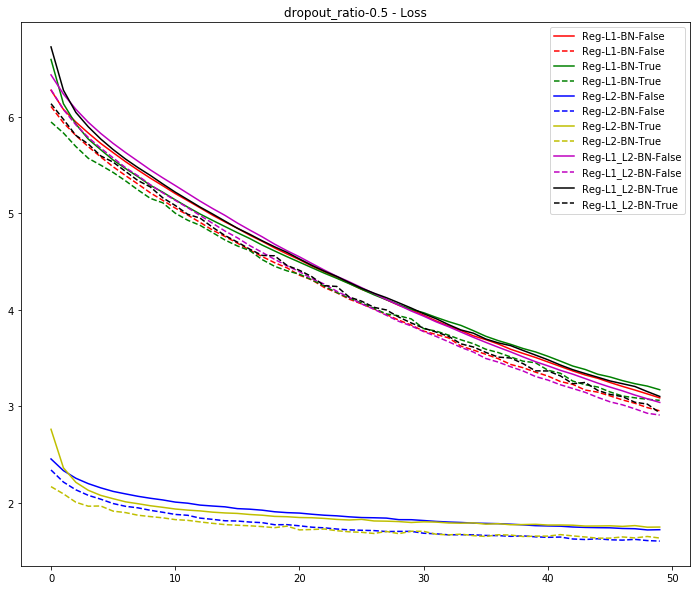

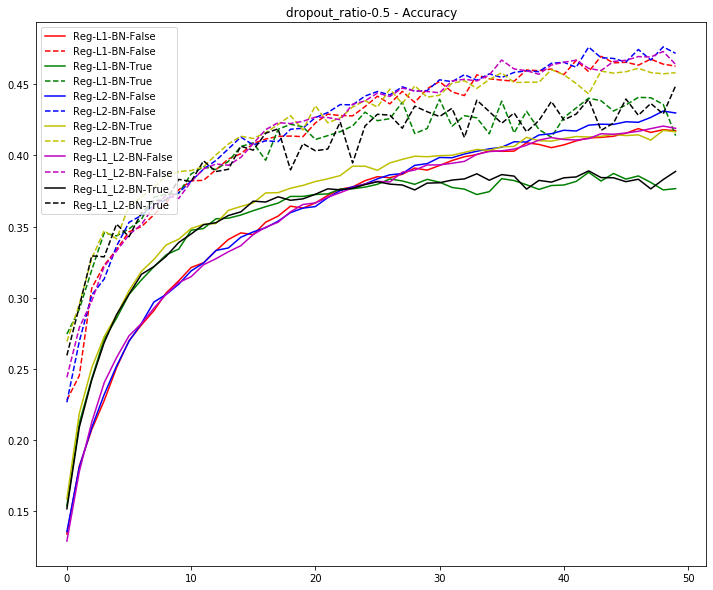

total time of 3 different regularizers x 2 BN: 3857.574308156967 seconds 



In [8]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.regularizers import l1, l2, l1_l2

for dropout in DROPOUT_R:
    results = {}
    t1 = time.time()
    for reg in REGULARIZER:
        for bn in BATCH_NORMALIZATION:
            keras.backend.clear_session() # 把舊的 Graph 清掉
            print("\n", "="*30)
            print(f"DROPOUT_R = {dropout}")
            print(f"REGULARIZER = {reg}")
            print(f"BATCH_NORMALIZATION = {bn}\n")
            
            # select different regularizers
            regularizer = {
                'L1': lambda: keras.regularizers.l1(REG_RATIO),
                'L2': lambda: keras.regularizers.l2(REG_RATIO),
                'L1_L2': lambda: keras.regularizers.l1_l2(l1 = REG_RATIO, l2 = REG_RATIO)
            }.get(reg)
            print(f"reg = {reg}")
            print(f"regularizer = {regularizer}")

            # build model
            model = build_mlp(input_shape = x_train.shape[1:],
                              regularizers = regularizer(),
                              bn = bn,
                              dropout_ratio = dropout
                             )

            model.summary()
            optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
            
            model.fit(x_train, y_train,
                      epochs = EPOCHS,
                      batch_size = BATCH_SIZE,
                      validation_data = (x_test, y_test),
                      shuffle = True)
            
            # Score trained model.
            scores = model.evaluate(x_test, y_test, verbose=1)
            print('Test loss:', scores[0])
            print('Test accuracy:', scores[1])
        
            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["accuracy"]
            valid_acc = model.history.history["val_accuracy"]
            
            dropout_tag = f"dropout_ratio-{str(dropout)}"
            
            result_tag = f"Reg-{str(reg)}-BN-{str(bn)}"
            results[result_tag] = {'train-loss': train_loss,
                                  'valid-loss': valid_loss,
                                  'train-acc': train_acc,
                                  'valid-acc': valid_acc}
            
    plot_result(name_tag = dropout_tag, result_dict = results)
    t2 = time.time()
    print(f"total time of 3 different regularizers x 2 BN: {t2-t1} seconds \n")
